In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
state = 'DL'

In [5]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [6]:
cases = c_data[state].resample('D').mean()#D,W,MS

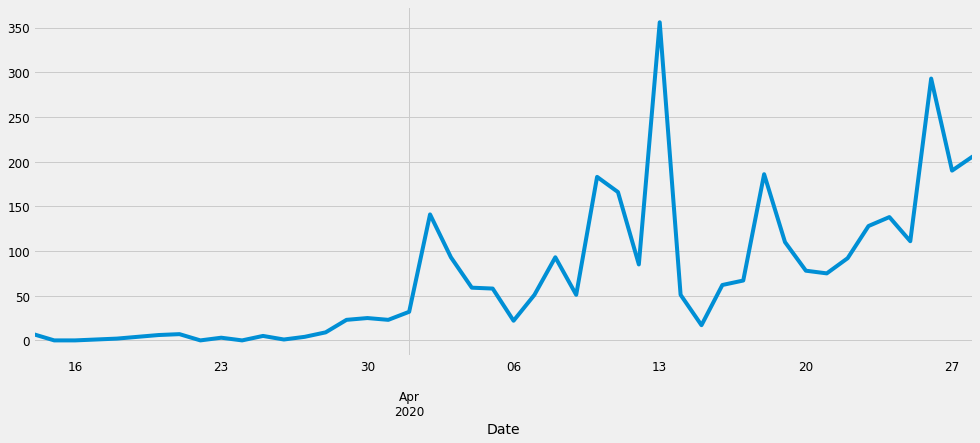

In [7]:
cases.plot(figsize=(15, 6))
plt.show()

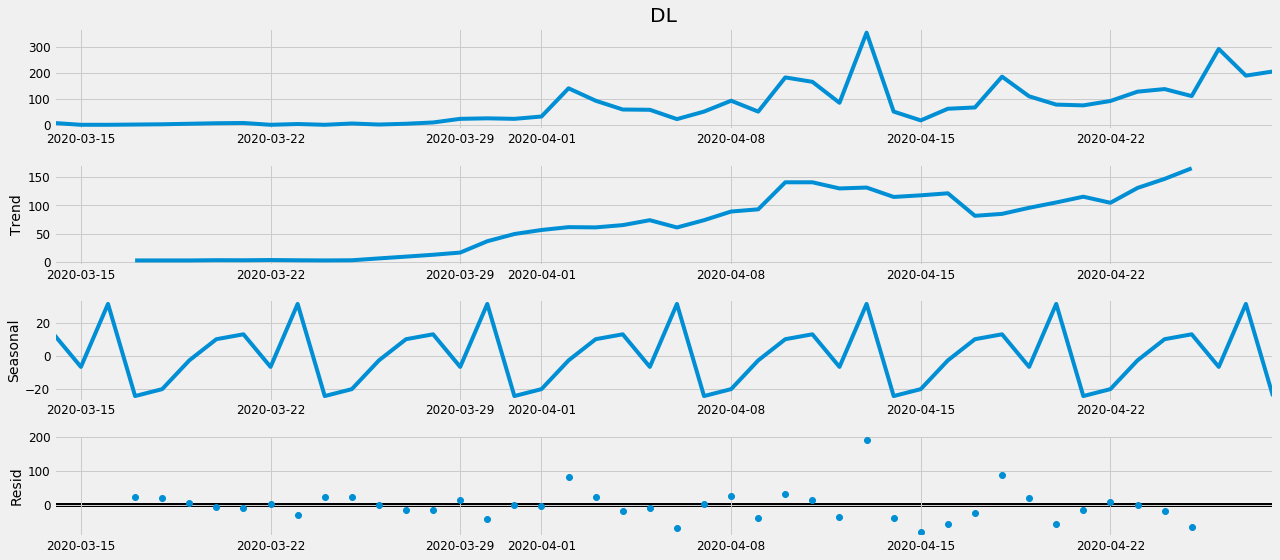

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [9]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:552.1978262426031
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1438.7604165869175

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:408.24607863160634
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:266.80098417992883
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:419.84995445623736
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1672.927920135835

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:277.2378658192754
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:265.2987047454014
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:525.6650559085679
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3104.172944487944
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:398.136420381034
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:254.22614187059236
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:417.36922127374476


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2376.6091872558063
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:274.84916719751556
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:249.5088237694041
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:512.6664349261201
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1512.159051143893
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:411.9659412270753


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:255.21746447708577
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:391.27559922056395
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1070.8483299509762
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:257.0627097005199
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:243.75702700217647
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:486.52617658489766
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3025.9716584091143
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:383.67108049129314
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:233.87476316126515
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:382.46641459045907
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2406.6758263316697
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:246.21425881380432
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:222.7707141405427
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:520.3713130495081
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1472.3499301925651
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:409.1589788237328
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:263.5097055945345
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:391.457425288692

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2476.872396125391
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:397.07643471479264
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:246.99042317145495
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:381.58906851260235


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2474.35338838758
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:248.22152967563161
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:240.52263224901537
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:502.95291937854694


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1284.9383937343437
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:403.3984596001661
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:250.57319504078004
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:375.77453821738004


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1065.301352962643
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:241.87240024656612
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:240.5499301595692
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:488.5254023159271
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2893.3602391665927
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:385.6666119956851
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:235.86959694501377
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:373.7340245163556


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2062.394482197136
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:236.81332719439075
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:224.65361580511544


In [11]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0167      0.261     -0.064      0.949      -0.529       0.496
ma.L1         -1.0000   3028.414     -0.000      1.000   -5936.582    5934.582
ma.S.L12      -1.0000   3028.576     -0.000      1.000   -5936.900    5934.900
sigma2      6098.5861      0.424   1.44e+04      0.000    6097.755    6099.417


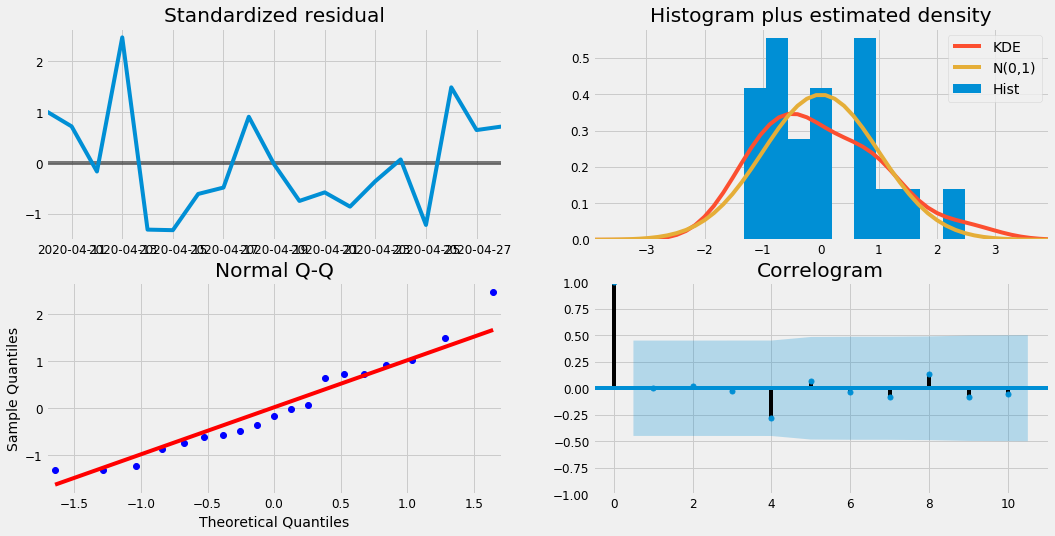

In [12]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

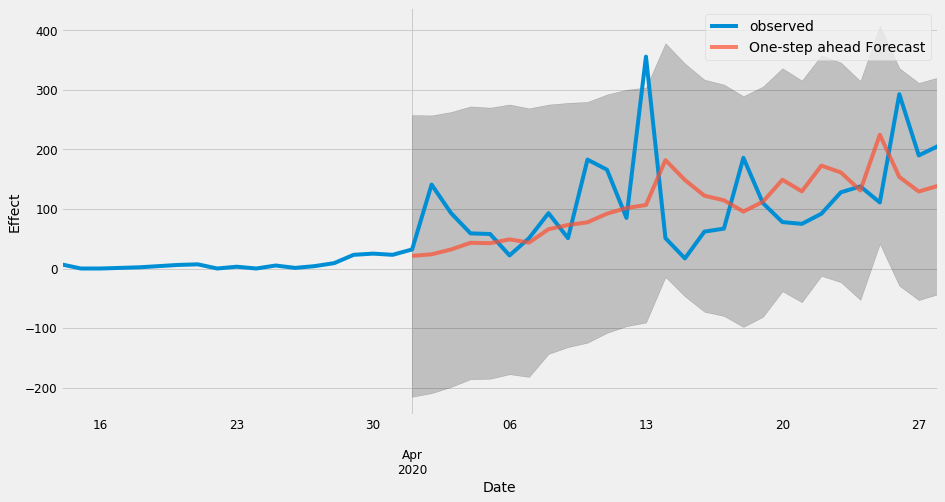

In [13]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [14]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 7280.66


In [15]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 85.33


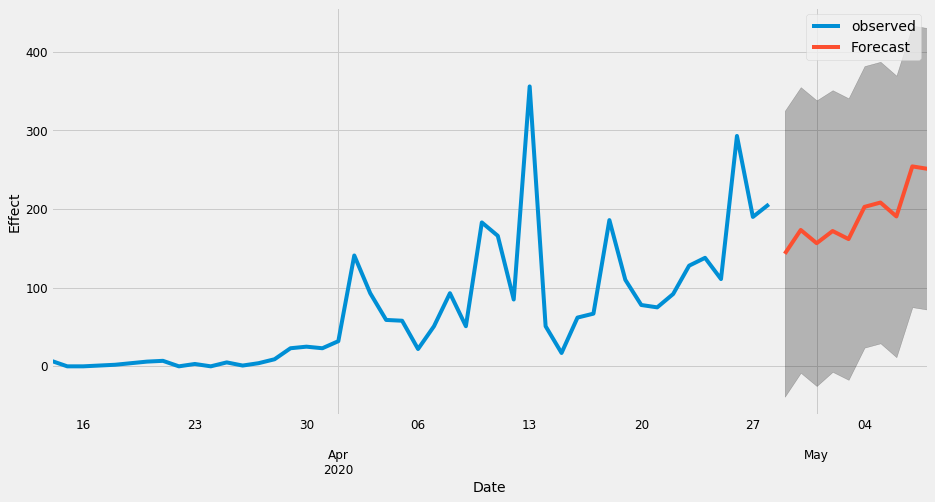

In [16]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [17]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [18]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [19]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,138,49
2020-04-25,111,12
2020-04-26,293,8
2020-04-27,190,0
2020-04-28,206,201


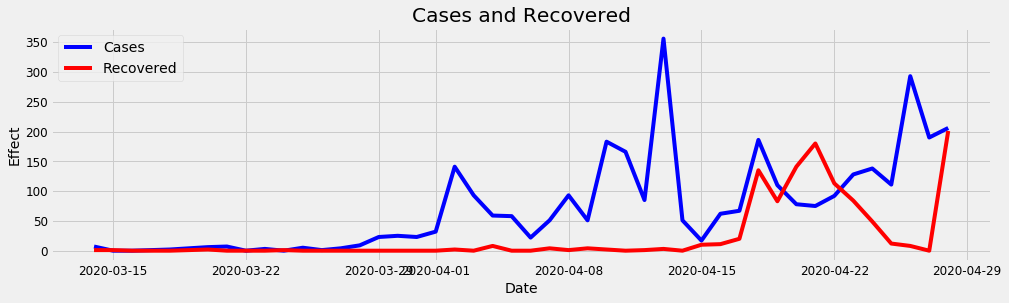

In [20]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [21]:
recovered = total_data['Recovered'].resample('D').mean()

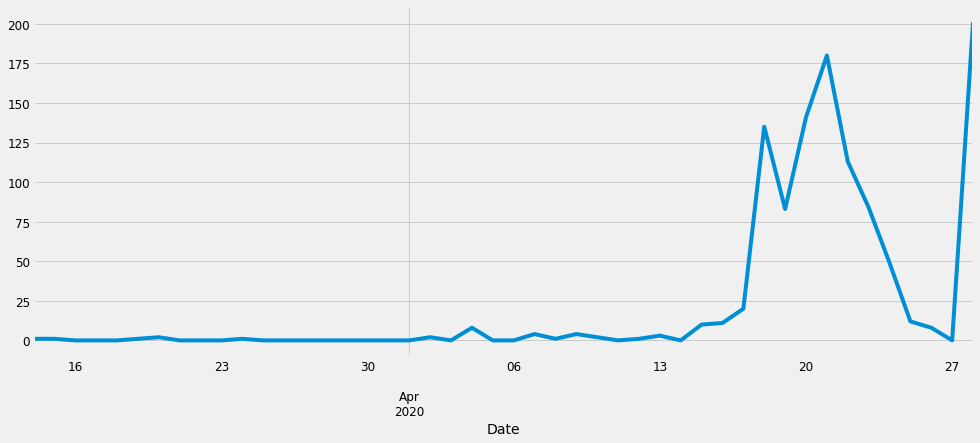

In [22]:
recovered.plot(figsize=(15, 6))
plt.show()

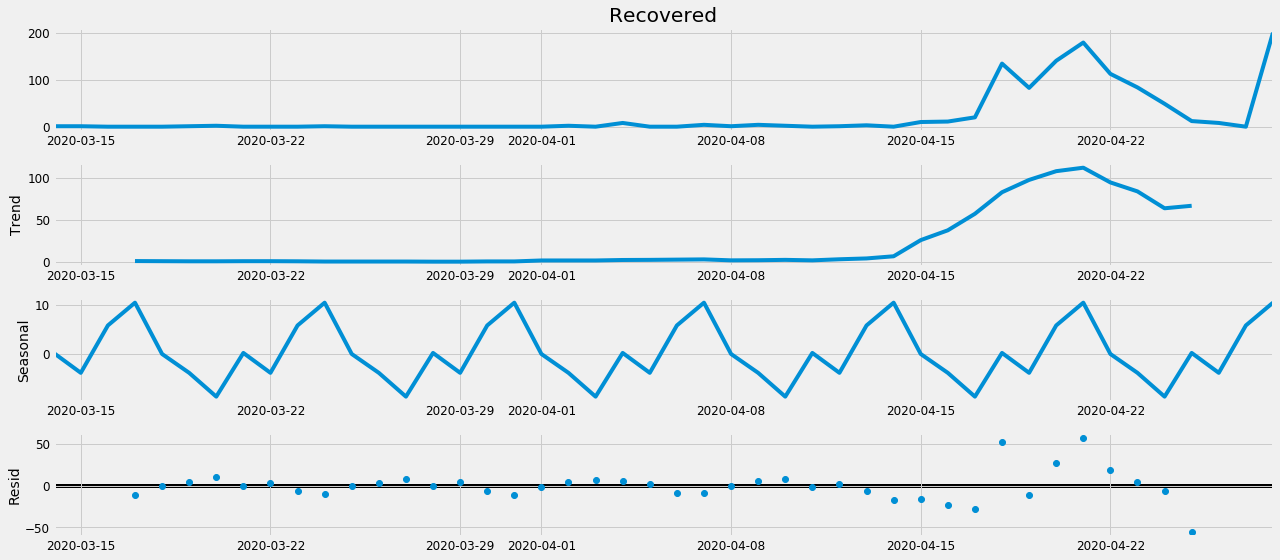

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [24]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:491.93922393533643


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1364.0252887114355
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:369.7766084368427
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:247.42324729160697
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:371.66284509194537


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1487.124023482319
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:255.4207299246421


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:247.04488076786893
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:465.0640517077342
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2291.253968335778

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:348.29961389177765
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:230.4540624180587
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:368.1718436355785
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3335.4680597281513
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:251.18322385061404
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:232.45370504748874
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:450.98638720024525


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1130.7242737605804
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:338.99846488548565
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:223.76769357446804
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:350.19320901091174


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1308.0921678115133
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:231.05064702139958
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:226.54678512757522
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:443.18422063752985
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2904.895418350529
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:330.653507027845
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:215.35199087751863
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:351.71441743413783
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1675.9073301574201
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:233.04937129525558
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:214.60555790707846
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:460.7875532746141


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1350.6075355110372
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:349.0836455212646
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:234.901064516231
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:351.08068817012975
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1518.4559331800356
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:232.75774843869704
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:234.05653426563748
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:453.41569376897365
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1902.4013104594048
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:341.27157966942
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:226.80322121310292
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:352.5392615822084


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1408.6824473690904
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:234.74890922928756
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:226.1798636294686
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:452.29898173770994


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1168.6677788172306
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:340.0526997651781
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:225.2864323211234
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:341.99092583150974


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1436.0228386445658
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:223.21007680891216
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:224.5439503063111
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:445.0749936703404
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1508.5912943711705
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:332.5213683860817
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:216.24990861479705
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:343.5102037355008
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1792.443269861521
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:225.2066871624618
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:215.91879102591787


In [25]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5807      0.607      0.957      0.338      -0.608       1.770
ma.L1         -0.8771      0.484     -1.812      0.070      -1.826       0.072
ma.S.L12      -4.5688    149.803     -0.030      0.976    -298.177     289.039
sigma2       160.3288   1.05e+04      0.015      0.988   -2.03e+04    2.06e+04


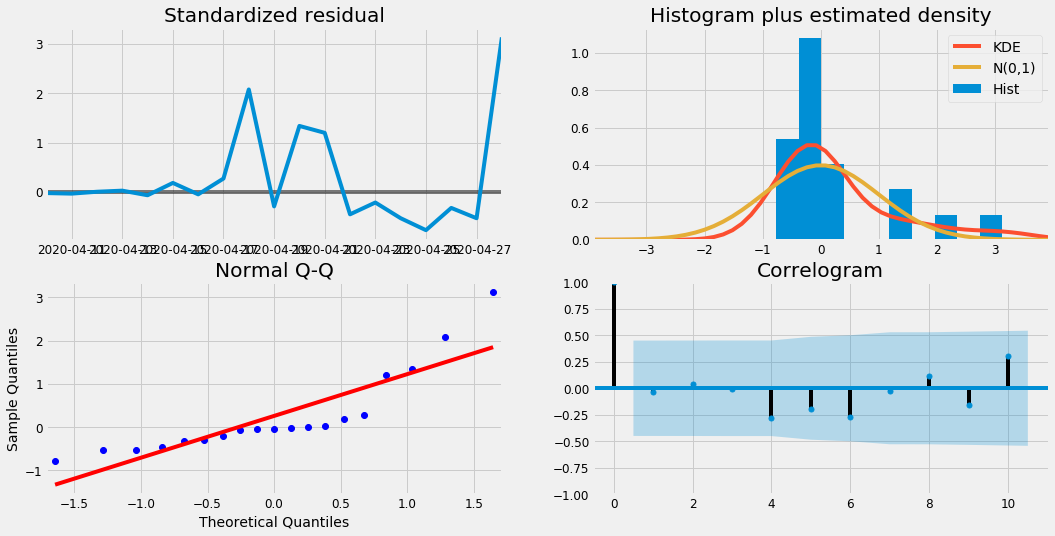

In [26]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

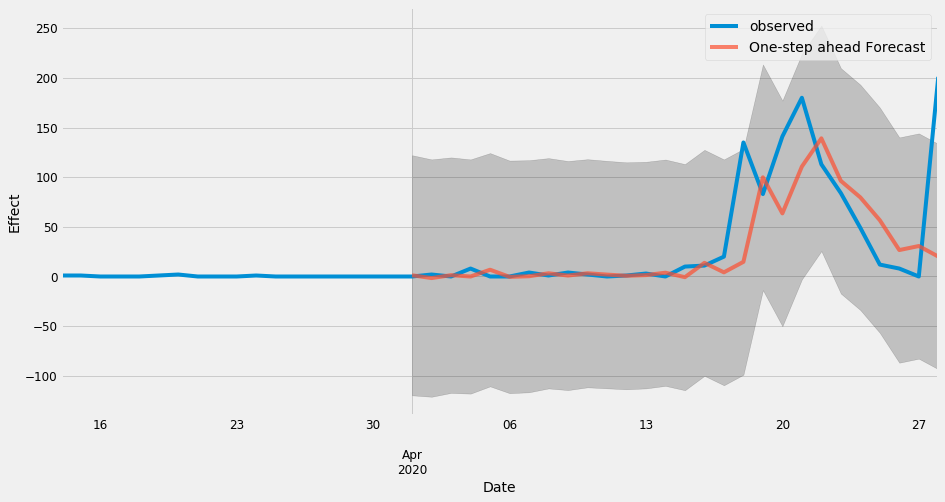

In [27]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [28]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 2281.65


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 47.77


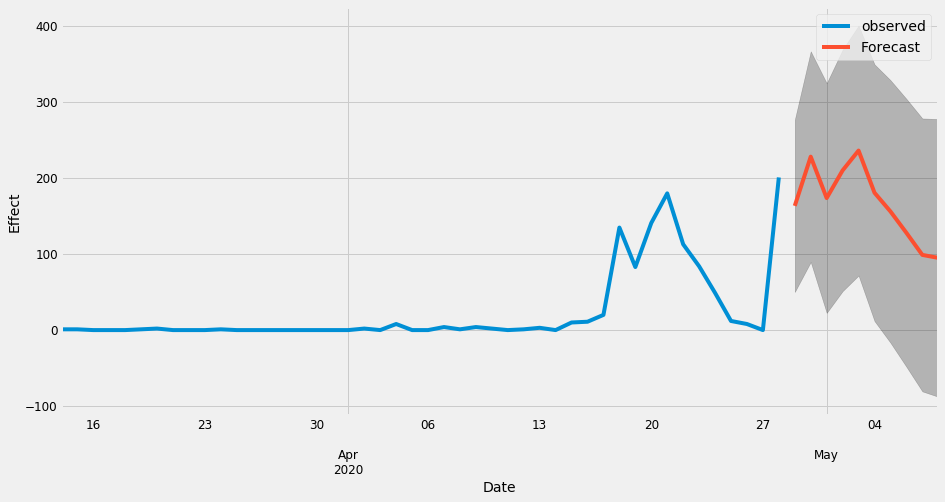

In [30]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

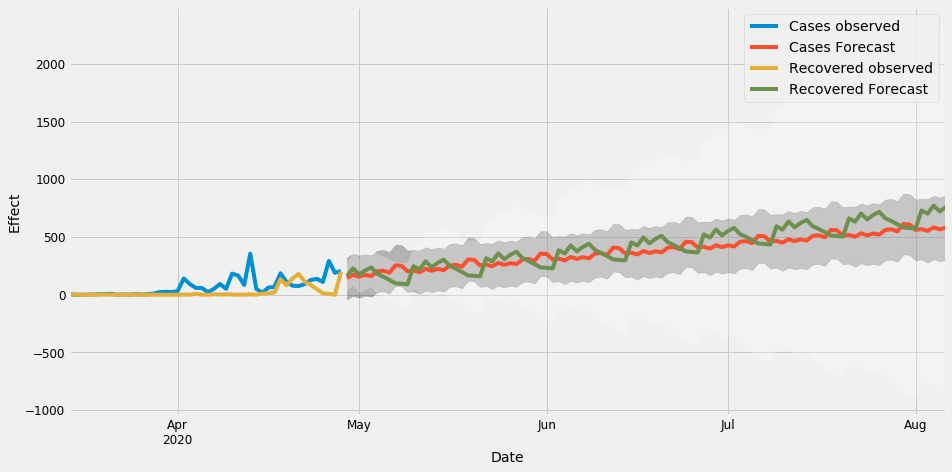

In [31]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [32]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [33]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [34]:
int(np.mean(cases_result_date)[0])

381

In [35]:
int(min(cases_result_date[0]))

143

In [36]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [37]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [38]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-05


In [39]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-03
